<a href="https://colab.research.BVHle.com/github/amanjain252002/Stock-Price-Prediction/blob/main/Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.BVHle.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tensorflow pandas matplotlib 
 

/Users/macbook/.zshenv:1: command not found: c
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

/Library/Python/3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
ACB = pd.read_csv("./Database/Pre_Processed_ACB.csv")
BIDV = pd.read_csv("./Database/Pre_Processed_BIDV.csv")
BVH = pd.read_csv("./Database/Pre_Processed_BVH.csv")
CTG = pd.read_csv("./Database/Pre_Processed_CTG.csv")
FPT = pd.read_csv("./Database/Pre_Processed_FPT.csv")

### Data Proprocessing

In [4]:
def Dataset(Data, Date):

  Train_Data = Data['Adj. Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj. Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

### Model

In [5]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [6]:
model = Model()

/Users/macbook/.zshenv:1: command not found: c
Defaulting to user installation because normal site-packages is not writeable


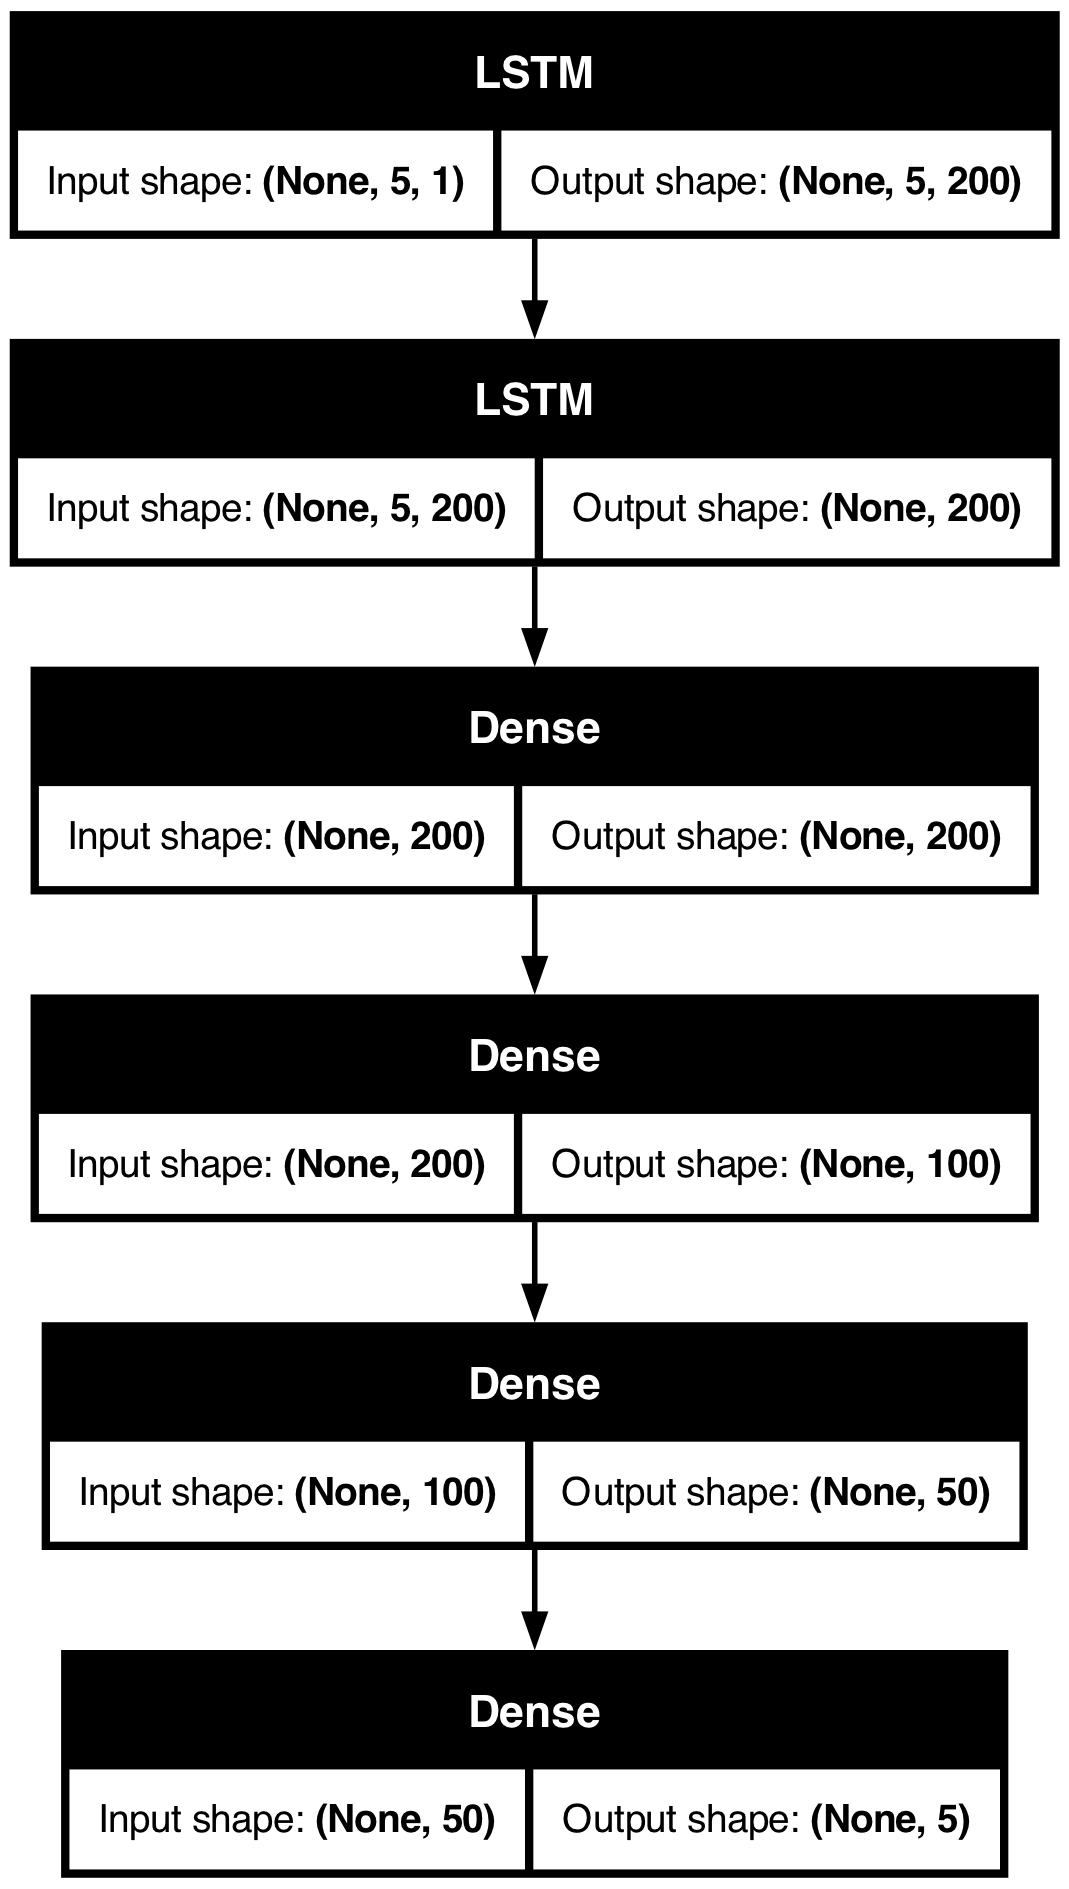

In [7]:
! pip install pydot
tf.keras.utils.plot_model(model, show_shapes=True)

In [8]:

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 200)         │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 548,005 (2.09 MB)

 Trainable params: 548,005 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

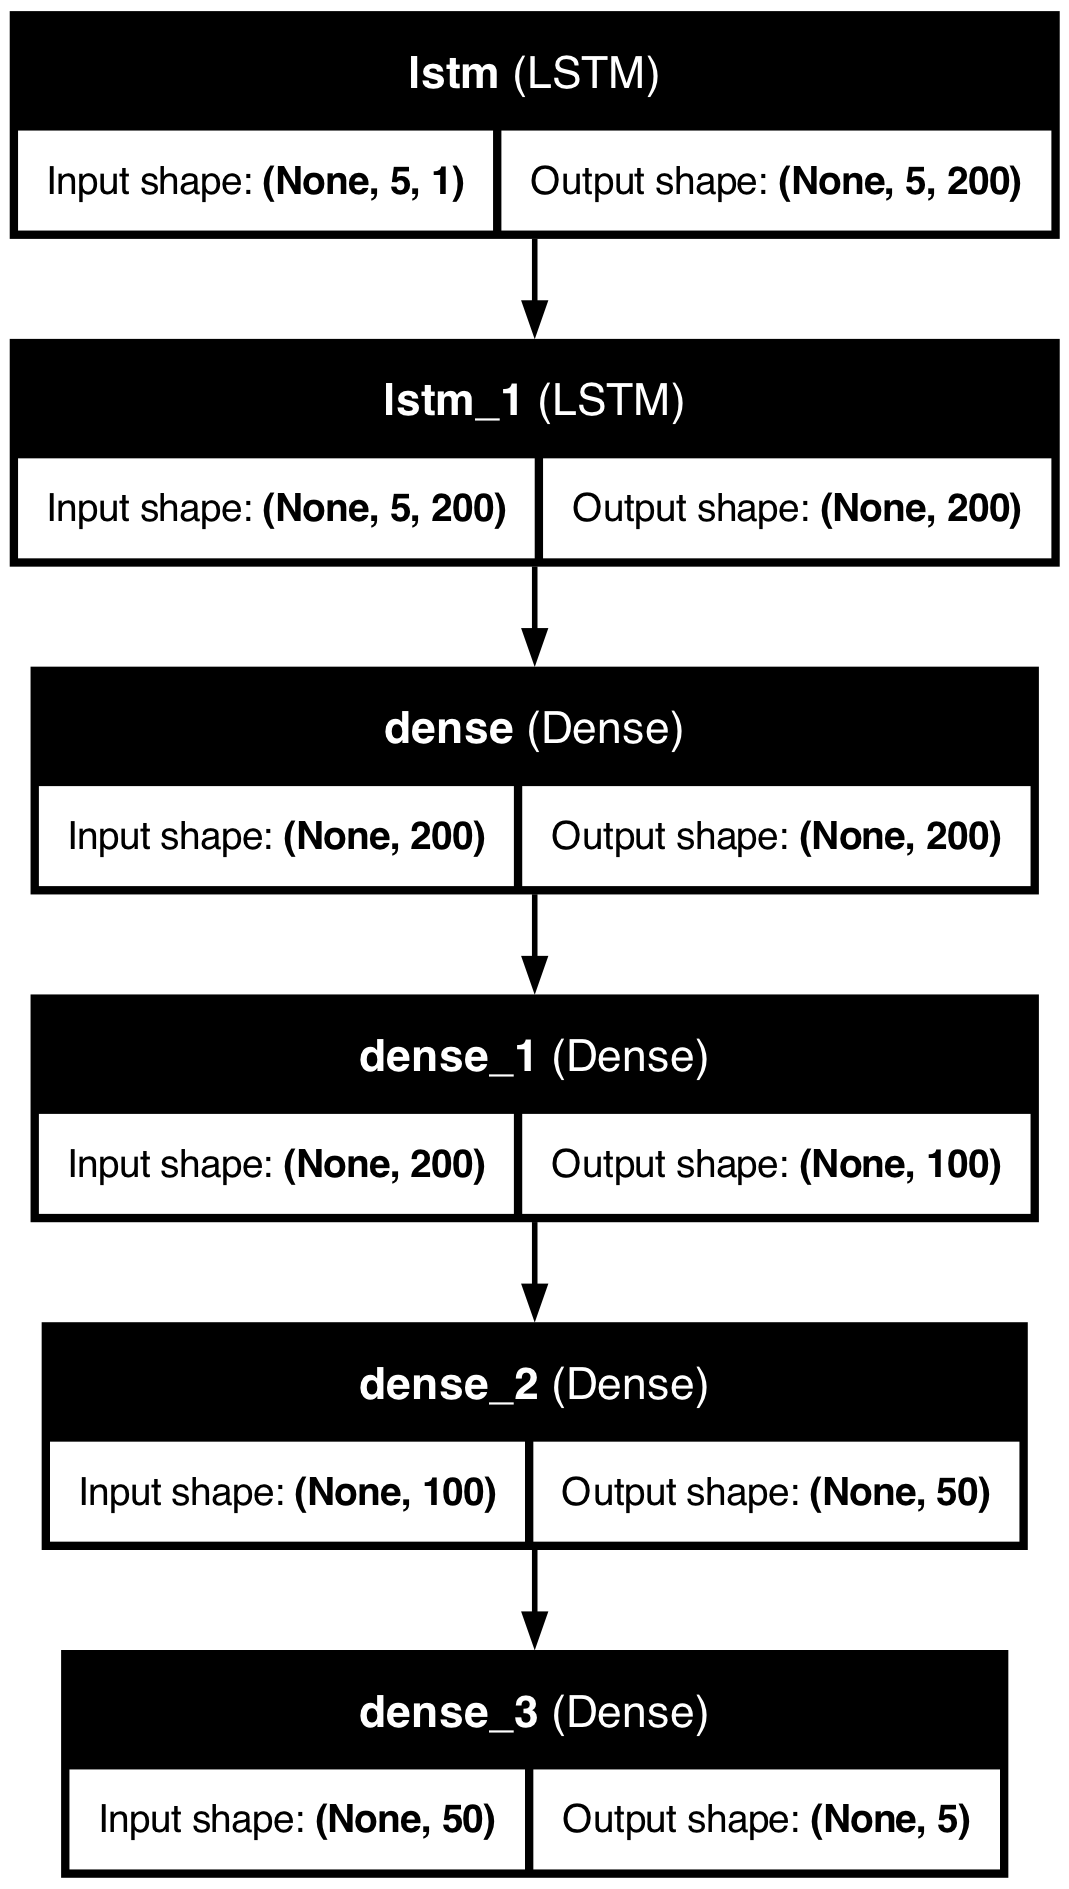

In [9]:
tf.keras.utils.plot_model(model, show_shapes=True,show_layer_names=True )

### Custom Learning Rate

In [10]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

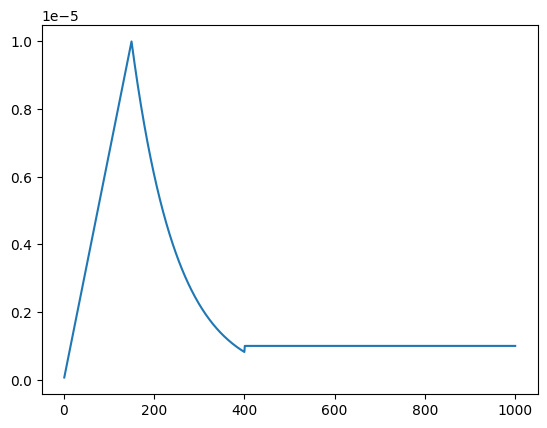

In [11]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [12]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

#Apple

In [13]:
ACB.head()

,Date,Open,High,Low,Adj. Close,Volume
0,2019-01-02 00:00:00,11.703,11.693,11.416,11.544,1103106.0
1,2019-01-03 00:00:00,10.398,11.360,10.267,11.110,1956382.0
2,2019-01-04 00:00:00,11.070,11.413,11.052,11.189,2771983.0
3,2019-01-07 00:00:00,11.426,11.402,11.244,11.347,1305819.0
4,2019-01-08 00:00:00,12.414,12.378,11.235,11.268,846226.0


In [14]:
ACB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1427 non-null   object 
 1   Open        1427 non-null   float64
 2   High        1427 non-null   float64
 3   Low         1427 non-null   float64
 4   Adj. Close  1427 non-null   float64
 5   Volume      1427 non-null   float64
dtypes: float64(5), object(1)
memory usage: 67.0+ KB


In [15]:
# Change Dtype of Date column
#["Date"] = pd.to_datetime(ACB["Date"])

SyntaxError: cannot assign to literal (93811842.py, line 2)

### Split the Data into Training and Test set


In [16]:
ACB_Date = '2023-07-21'
ACB_Train_X, ACB_Train_Y, ACB_Test_X, ACB_Test_Y = Dataset(ACB, ACB_Date)

### Model Fitting

In [17]:
ACB_Model = Model()

In [18]:
ACB_Model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [19]:
ACB_hist = ACB_Model.fit(ACB_Train_X, ACB_Train_Y, epochs = 1000, validation_data = (ACB_Test_X, ACB_Test_Y), callbacks=[callback])

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 291.3666 - root_mean_squared_error: 17.0692 - val_loss: 600.9118 - val_root_mean_squared_error: 24.5135 - learning_rate: 0.0000e+00
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 298.0399 - root_mean_squared_error: 17.2631 - val_loss: 600.9039 - val_root_mean_squared_error: 24.5133 - learning_rate: 6.6667e-08
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 283.9257 - root_mean_squared_error: 16.8461 - val_loss: 600.8885 - val_root_mean_squared_error: 24.5130 - learning_rate: 1.3333e-07
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 300.6007 - root_mean_squared_error: 17.3294 - val_loss: 600.8646 - val_root_mean_squared_error: 24.5125 - learning_rate: 2.0000e-07
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 294.5985 - root_mean_squared_error: 17.1612 - val_loss: 600.8325 - val_root_mean_squared_error: 24.5119 - learning_rate: 2.6667e-07
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms

In [20]:
history_dict = ACB_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

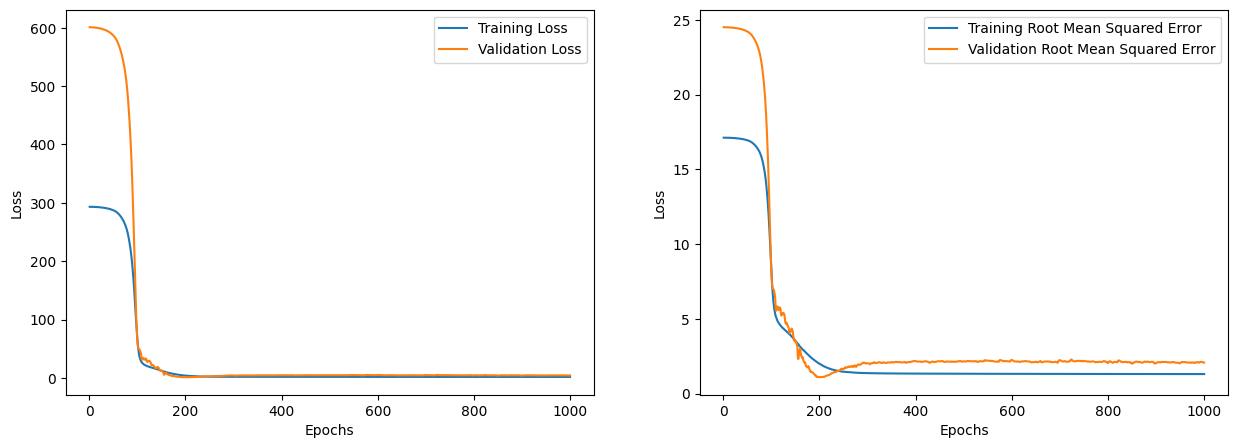

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of ACB

In [22]:
ACB_prediction = ACB_Model.predict(ACB_Test_X)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


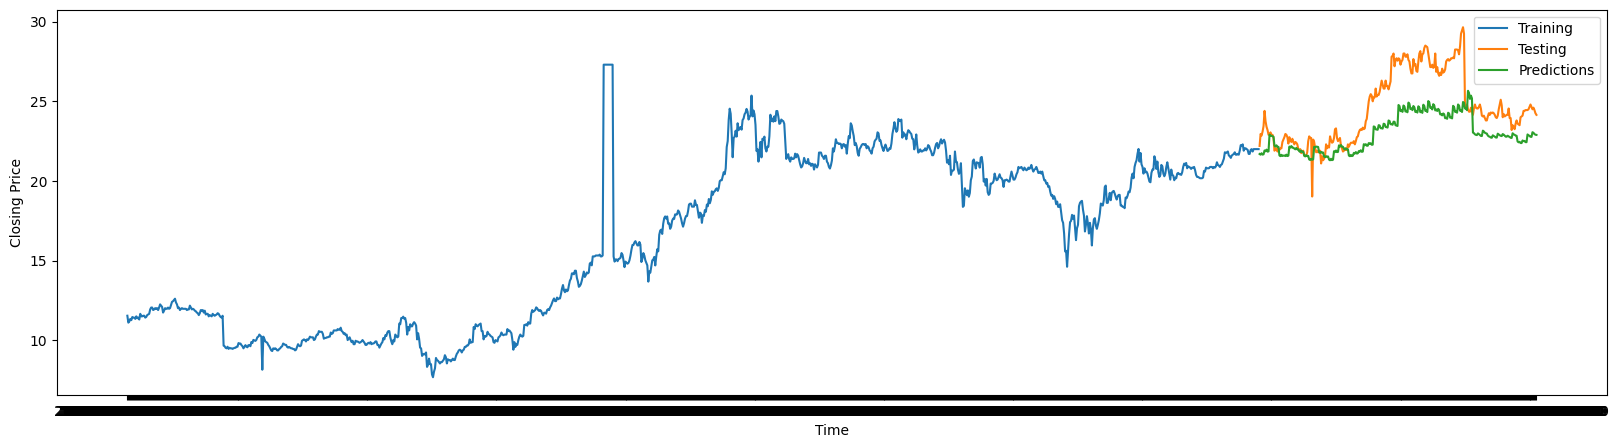

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the start date of testing period
test_start_date = '2023-07-21'

# Ensure that ACB_Test_Y and ACB_prediction are 1-dimensional
ACB_Test_Y = np.ravel(ACB_Test_Y)  # Flatten if necessary
ACB_prediction = np.ravel(ACB_prediction)  # Flatten if necessary

# Create a DataFrame for testing data
# Ensure dates for the testing period align with the length of ACB_Test_Y
ACB_Test_Data = pd.DataFrame({
    'Date': ACB['Date'][ACB['Date'] >= test_start_date].reset_index(drop=True)[:len(ACB_Test_Y)],
    'Adj. Close': ACB_Test_Y
})

# Add predictions to the DataFrame
ACB_Test_Data['Predictions'] = ACB_prediction

# Plotting
plt.figure(figsize=(20, 5))

# Plot Training Data
plt.plot(ACB['Date'][ACB['Date'] < test_start_date], ACB['Adj. Close'][ACB['Date'] < test_start_date], label='Training')

# Plot Testing Data
plt.plot(ACB_Test_Data['Date'], ACB_Test_Data['Adj. Close'], label='Testing')

# Plot Predictions
plt.plot(ACB_Test_Data['Date'], ACB_Test_Data['Predictions'], label='Predictions')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()


In [24]:

# Ensure that ACB_Test_Y and ACB_prediction are 1-dimensional and have the same length
ACB_Test_Y = np.ravel(ACB_Test_Y)
ACB_prediction = np.ravel(ACB_prediction)
# Calculate RMSE
rmse = math.sqrt(mean_squared_error(ACB_Test_Y, ACB_prediction))
print(f'RMSE: {rmse}')

# Calculate MAPE
mape = np.mean(np.abs((ACB_Test_Y - ACB_prediction) / ACB_Test_Y)) * 100
print(f'MAPE: {mape}%')

# Calculate MAE
mae = mean_absolute_error(ACB_Test_Y, ACB_prediction)
print(f'MAE: {mae}')

# Calculate SEM (Standard Error of the Mean)
sem = np.std(ACB_Test_Y - ACB_prediction) / np.sqrt(len(ACB_Test_Y))
print(f'SEM: {sem}')


RMSE: 2.0770703747121293
MAPE: 6.539668698133849%
MAE: 1.6889620274135044
SEM: 0.07871198514422612


# BIDV

In [26]:
BIDV.head()

,Date,Open,High,Low,Adj. Close,Volume
0,2019-01-02 00:00:00,11.703,11.693,11.416,11.544,1103106.0
1,2019-01-03 00:00:00,10.398,11.360,10.267,11.110,1956382.0
2,2019-01-04 00:00:00,11.070,11.413,11.052,11.189,2771983.0
3,2019-01-07 00:00:00,11.426,11.402,11.244,11.347,1305819.0
4,2019-01-08 00:00:00,12.414,12.378,11.235,11.268,846226.0


In [27]:
BIDV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1427 non-null   object 
 1   Open        1427 non-null   float64
 2   High        1427 non-null   float64
 3   Low         1427 non-null   float64
 4   Adj. Close  1427 non-null   float64
 5   Volume      1427 non-null   float64
dtypes: float64(5), object(1)
memory usage: 67.0+ KB


In [28]:
# Change Dtype of Date column
BIDV["Date"] = pd.to_datetime(BIDV["Date"])

### Split the Data into Training and Test set
    

In [29]:
BIDV_Date = '2023-07-21'
BIDV_Train_X, BIDV_Train_Y, BIDV_Test_X, BIDV_Test_Y = Dataset(BIDV, BIDV_Date)

### Model Fitting

In [30]:
BIDV_Model = Model()

In [31]:
BIDV_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])


In [32]:
BIDV_hist = BIDV_Model.fit(BIDV_Train_X, BIDV_Train_Y, epochs = 200, validation_data = (BIDV_Test_X, BIDV_Test_Y), callbacks=[callback])

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 303.2433 - root_mean_squared_error: 17.4124 - val_loss: 605.4965 - val_root_mean_squared_error: 24.6068 - learning_rate: 0.0000e+00
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 286.4513 - root_mean_squared_error: 16.9235 - val_loss: 605.4888 - val_root_mean_squared_error: 24.6067 - learning_rate: 6.6667e-08
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 295.0237 - root_mean_squared_error: 17.1718 - val_loss: 605.4728 - val_root_mean_squared_error: 24.6064 - learning_rate: 1.3333e-07
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 286.4534 - root_mean_squared_error: 16.9199 - val_loss: 605.4485 - val_root_mean_squared_error: 24.6059 - learning_rate: 2.0000e-07
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 297.0161 - root_mean_squared_error: 17.2338 - val_loss: 605.4173 - val_root_mean_squared_error: 24.6052 - learning_rate: 2.6667e-07
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 

In [33]:
history_dict = BIDV_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

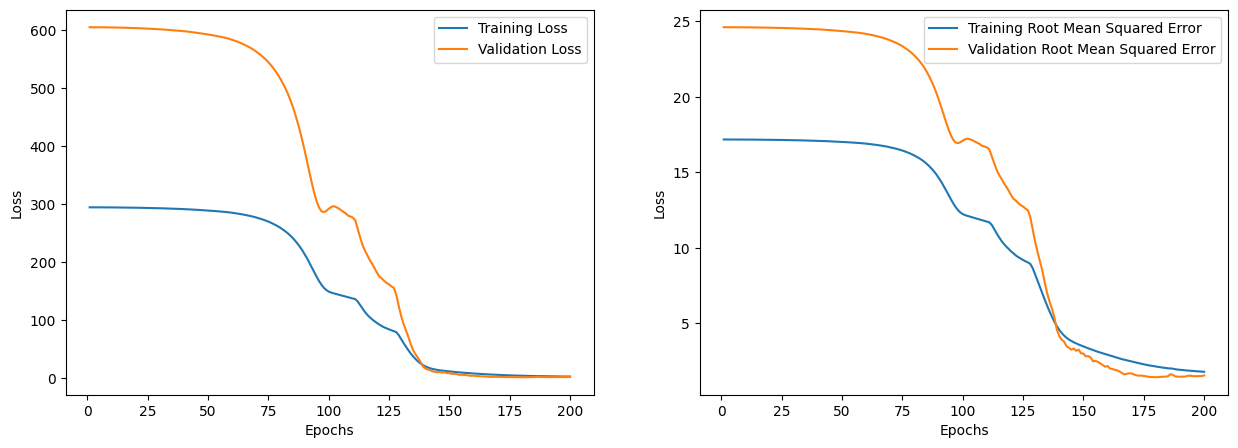

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Tesla

In [36]:
BIDV_prediction = BIDV_Model.predict(BIDV_Test_X)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


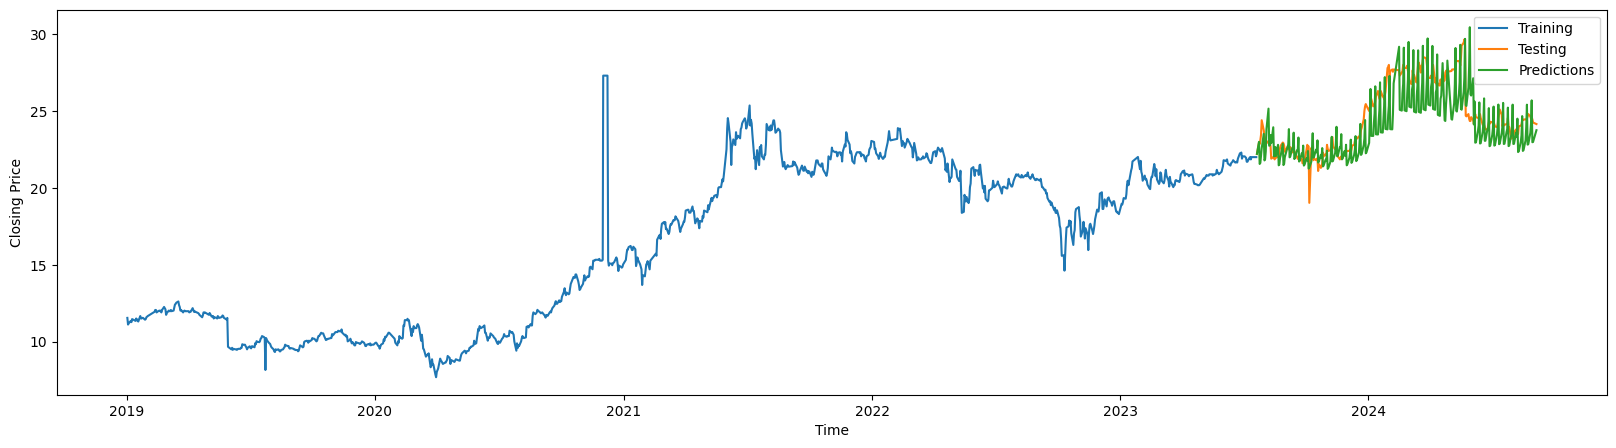

In [38]:

# Define the start date of testing period
test_start_date = '2023-07-21'

# Ensure that ACB_Test_Y and ACB_prediction are 1-dimensional
BIDV_Test_Y = np.ravel(BIDV_Test_Y)  # Flatten if necessary
BIDV_prediction = np.ravel(BIDV_prediction)  # Flatten if necessary

# Create a DataFrame for testing data
BIDV_Test_Data = pd.DataFrame({
    'Date': BIDV['Date'][BIDV['Date'] >= test_start_date].reset_index(drop=True)[:len(BIDV_Test_Y)],
    'Adj. Close': ACB_Test_Y
})

# Add predictions to the DataFrame
BIDV_Test_Data['Predictions'] = BIDV_prediction

# Plotting
plt.figure(figsize=(20, 5))

# Plot Training Data
plt.plot(BIDV['Date'][BIDV['Date'] < test_start_date], BIDV['Adj. Close'][BIDV['Date'] < test_start_date], label='Training')

# Plot Testing Data
plt.plot(BIDV_Test_Data['Date'],BIDV_Test_Data['Adj. Close'], label='Testing')

# Plot Predictions
plt.plot(BIDV_Test_Data['Date'], BIDV_Test_Data['Predictions'], label='Predictions')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')
plt.show()


In [39]:
rmse = math.sqrt(mean_squared_error(BIDV_Test_Y.reshape(-1, 5), BIDV_prediction))
mape = np.mean(np.abs(BIDV_prediction - BIDV_Test_Y.reshape(-1, 5))/np.abs(BIDV_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

ValueError: Found input variables with inconsistent numbers of samples: [56, 280]

#BVHle

In [ ]:
BVH.head()

In [ ]:
BVH.info()

In [39]:
# Change Dtype of Date column
BVH["Date"] = pd.to_datetime(BVH["Date"])

###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-10-30

    Testing Period:  2020-11-02 - 2021-02-26

In [40]:
BVH_Date = '2020-11-01'
BVH_Train_X, BVH_Train_Y, BVH_Test_X, BVH_Test_Y = Dataset(BVH, BVH_Date)

### Model Fitting

In [41]:
BVH_Model = Model()

In [42]:
BVH_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
BVH_hist = BVH_Model.fit(BVH_Train_X, BVH_Train_Y, epochs = 1000, validation_data = (BVH_Test_X, BVH_Test_Y), callbacks = [callback])

In [44]:
history_dict = BVH_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of BVHle

In [ ]:
BVH_prediction = BVH_Model.predict(BVH_Test_X)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(BVH['Date'][BVH['Date'] < '2020-11-07'], BVH['Adj. Close'][BVH['Date'] < '2020-11-07'], label = 'Training')
plt.plot(BVH['Date'][BVH['Date'] >= '2020-11-07'], BVH['Adj. Close'][BVH['Date'] >= '2020-11-07'], label = 'Testing')
plt.plot(BVH['Date'][BVH['Date'] >= '2020-11-07'], BVH_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(GOOG_Test_Y.reshape(-1, 5), GOOG_prediction))
mape = np.mean(np.abs(GOOG_prediction - GOOG_Test_Y.reshape(-1, 5))/np.abs(GOOG_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

#Microsoft

In [ ]:
MSFT.head()

In [ ]:
MSFT.info()

In [51]:
# Change Dtype of Date column
MSFT["Date"] = pd.to_datetime(MSFT["Date"])

###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [52]:
MSFT_Date = '2020-10-01'
MSFT_Train_X, MSFT_Train_Y, MSFT_Test_X, MSFT_Test_Y = Dataset(MSFT, MSFT_Date)

### Model Fitting

In [53]:
MSFT_Model = Model()

In [54]:
MSFT_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
MSFT_hist = MSFT_Model.fit(MSFT_Train_X, MSFT_Train_Y, epochs = 1000, validation_data = (MSFT_Test_X, MSFT_Test_Y), callbacks=[callback])

In [56]:
history_dict = MSFT_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Microsoft

In [ ]:
MSFT_prediction = MSFT_Model.predict(MSFT_Test_X)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(MSFT['Date'][MSFT['Date'] < '2020-10-12'], MSFT['Adj. Close'][MSFT['Date'] < '2020-10-12'], label = 'Training')
plt.plot(MSFT['Date'][MSFT['Date'] >= '2020-10-09'], MSFT['Adj. Close'][MSFT['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(MSFT['Date'][MSFT['Date'] >= '2020-10-12'], MSFT_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(MSFT_Test_Y.reshape(-1, 5), MSFT_prediction))
mape = np.mean(np.abs(MSFT_prediction - MSFT_Test_Y.reshape(-1, 5))/np.abs(MSFT_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

#Amazon

In [ ]:
AMZN.head()

In [ ]:
AMZN.info()

In [63]:
# Change Dtype of Date column
AMZN["Date"] = pd.to_datetime(AMZN["Date"])

###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-10-30

    Testing Period:  2020-11-02 - 2021-02-26

In [64]:
AMZN_Date = '2020-11-01'
AMZN_Train_X, AMZN_Train_Y, AMZN_Test_X, AMZN_Test_Y = Dataset(AMZN, AMZN_Date)

### Model Fitting

In [65]:
AMZN_Model = Model()

In [66]:
AMZN_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
AMZN_hist = AMZN_Model.fit(AMZN_Train_X, AMZN_Train_Y, epochs = 200, validation_data = (AMZN_Test_X, AMZN_Test_Y), callbacks=[callback])

In [68]:
history_dict = AMZN_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Amazon

In [ ]:
AMZN_prediction = AMZN_Model.predict(AMZN_Test_X)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(AMZN['Date'][AMZN['Date'] < '2020-11-07'], AMZN['Adj. Close'][AMZN['Date'] < '2020-11-07'], label = 'Training')
plt.plot(AMZN['Date'][AMZN['Date'] >= '2020-11-07'], AMZN['Adj. Close'][AMZN['Date'] >= '2020-11-07'], label = 'Testing')
plt.plot(AMZN['Date'][AMZN['Date'] >= '2020-11-07'], AMZN_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(AMZN_Test_Y.reshape(-1, 5), AMZN_prediction))
mape = np.mean(np.abs(AMZN_prediction - AMZN_Test_Y.reshape(-1, 5))/np.abs(AMZN_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')